In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata

# Define the contour-based surface plot function
def plot_contour_surface(data, x_label, y_label, z_label):
    """
    Generate a high-resolution heatmap with contour lines based on the given 3D data.
    """
    # Convert data to numpy array for easier manipulation
    data = np.array(data)

    # Extract the columns for x, y, and z
    x, y, z = data[:, 0], data[:, 1], data[:, 2]

    # Generate a finer grid for interpolation
    grid_x, grid_y = np.meshgrid(
        np.linspace(x.min(), x.max(), 200),  # Increased resolution
        np.linspace(y.min(), y.max(), 200)
    )

    # Interpolate z values using cubic interpolation
    grid_z = griddata((x, y), z, (grid_x, grid_y), method='cubic')

    # Create a high-resolution heatmap with contour lines
    plt.figure(figsize=(8, 6))
    plt.imshow(grid_z, extent=[x.min(), x.max(), y.min(), y.max()], origin='lower', cmap='viridis', aspect='auto')
    plt.colorbar(label=z_label)

    # Add contour lines
    contour_levels = np.linspace(grid_z.min(), grid_z.max(), 15)  # Define contour levels
    plt.contour(grid_x, grid_y, grid_z, levels=contour_levels, colors='black', linewidths=0.8)
    

    

    # Add labels and title
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    # plt.title(f'{z_label} Contour Heatmap')

    # Show the plot
    plt.show()


100


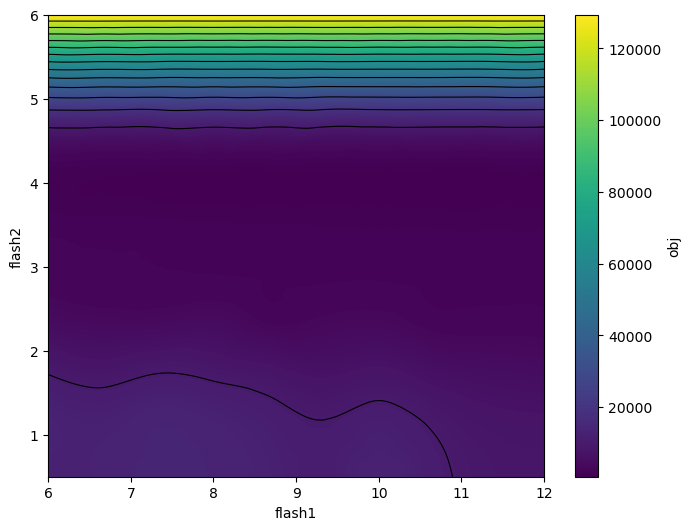

[8.0, 4.166666666666667, 1275.2653162632334]
[8.666666666666666, 4.166666666666667, 1235.329989440965]
[9.333333333333332, 4.166666666666667, 1207.6793970677484]
[10.0, 4.166666666666667, 1187.136282983764]
[10.666666666666666, 4.166666666666667, 1172.641173701356]
[11.333333333333332, 4.166666666666667, 1164.512657678149]
[12.0, 4.166666666666667, 1162.6865449045004]


In [4]:
data_file = "../FlashOperation/flash_simulation_data_sim_redo2.pkl"
import pickle
with open(data_file, "rb") as f:
    data = pickle.load(f)
print(len(data))
# Plot the contour-based surface plot
plot_contour_surface(data, 'flash1', 'flash2', 'obj')

#print data with small z 
for d in data:
    if d[2] < 1300:
        print(d)

Surface data for file surface_step_0.csv:


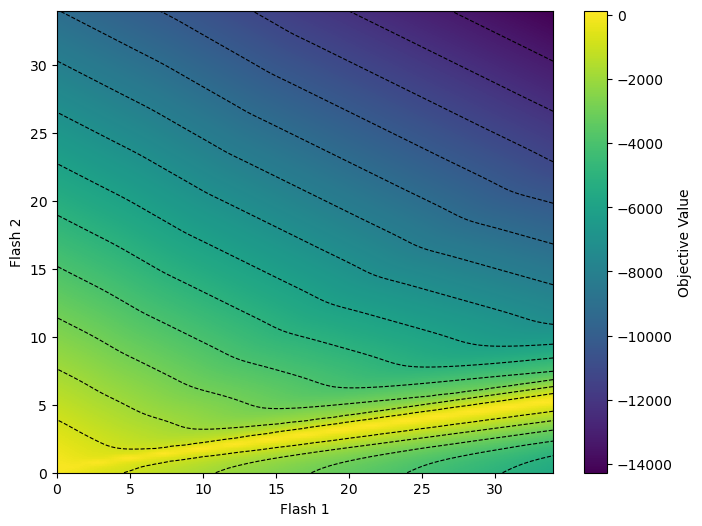

Surface data for file surface_step_10.csv:


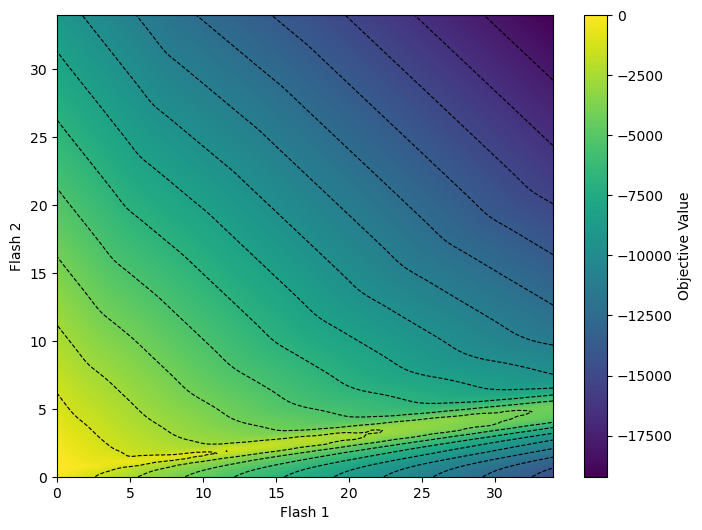

Surface data for file surface_step_15.csv:


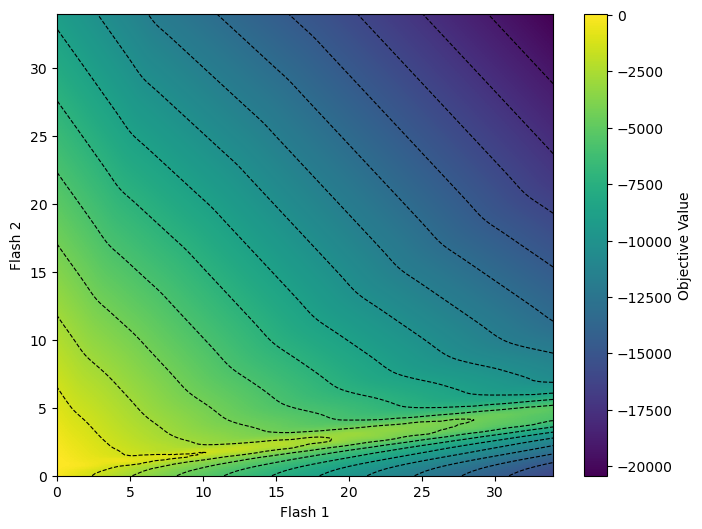

Surface data for file surface_step_20.csv:


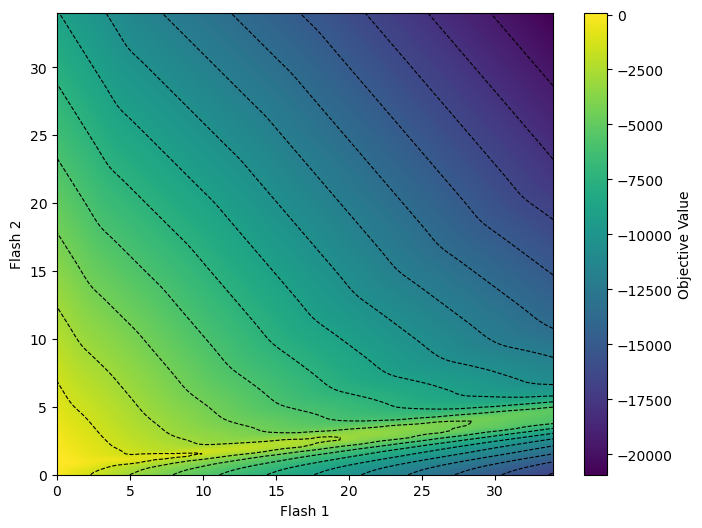

Surface data for file surface_step_5.csv:


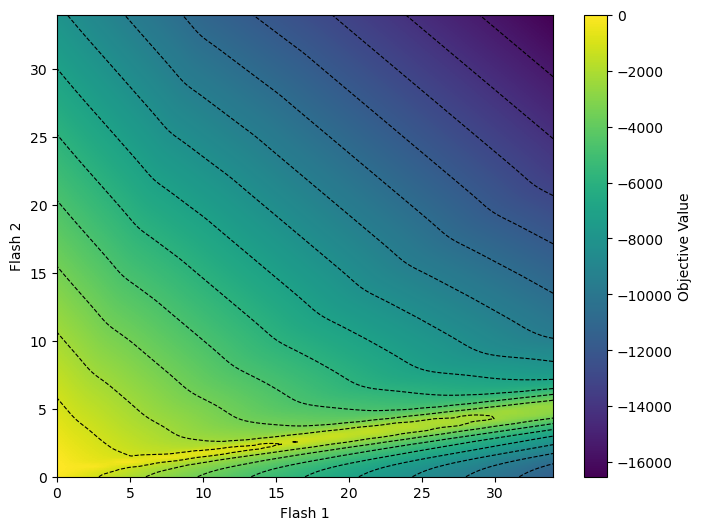

In [10]:
import pandas as pd
import os

# Get the list of all files in the surface2 directory and sort them
surface_dir = "./surface_redoflash"
surface_files = sorted([f for f in os.listdir(surface_dir) if f.endswith('.csv')])

# Loop through each file and plot the contour
for surface_file in surface_files:
    surface_data = pd.read_csv(os.path.join(surface_dir, surface_file))
    print(f"Surface data for file {surface_file}:")
    surface_data = np.array(surface_data)
    plot_contour_surface(surface_data, 'Flash 1', 'Flash 2', 'Objective Value')
    
    

        
# Delete the surface files
for surface_file in surface_files:
    os.remove(os.path.join(surface_dir, surface_file))

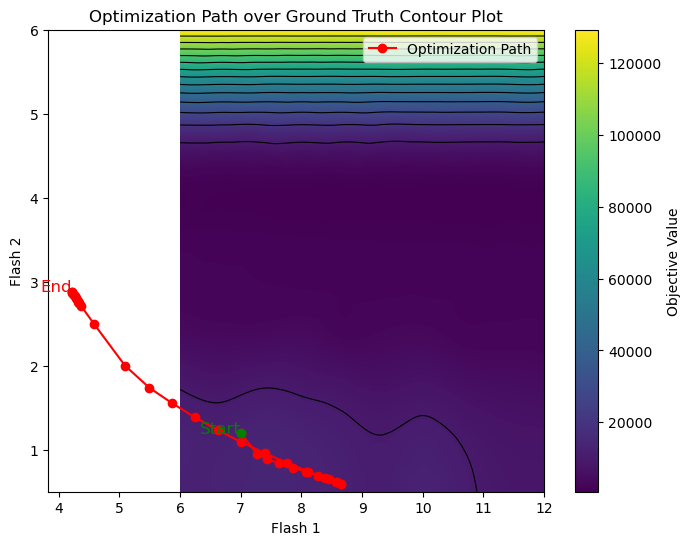

In [11]:
# Convert x_path to numpy array if not already
with open("../FlashOperation/x_path_redo.pkl", "rb") as f:
    x_path = pickle.load(f)

x_path = np.array(x_path)
data = np.array(data)
# Extract the columns for x, y, and z from the ground truth data
x, y, z = data[:, 0], data[:, 1], data[:, 2]

# Generate a finer grid for interpolation
grid_x, grid_y = np.meshgrid(
    np.linspace(x.min(), x.max(), 200),  # Increased resolution
    np.linspace(y.min(), y.max(), 200)
)

# Interpolate z values using cubic interpolation
grid_z = griddata((x, y), z, (grid_x, grid_y), method='cubic')

# Create a high-resolution heatmap with contour lines
plt.figure(figsize=(8, 6))
plt.imshow(grid_z, extent=[x.min(), x.max(), y.min(), y.max()], origin='lower', cmap='viridis', aspect='auto')
plt.colorbar(label='Objective Value')

# Add contour lines
contour_levels = np.linspace(grid_z.min(), grid_z.max(), 15)  # Define contour levels
plt.contour(grid_x, grid_y, grid_z, levels=contour_levels, colors='black', linewidths=0.8)

# Plot the optimization path
plt.plot(x_path[:, 0], x_path[:, 1], 'o-', label='Optimization Path', color='red')

# Add starting point
plt.scatter(x_path[0, 0], x_path[0, 1], color='green', zorder=5)
plt.text(x_path[0, 0], x_path[0, 1], 'Start', color='green', fontsize=12, ha='right')

# Add endpoint
plt.scatter(x_path[-1, 0], x_path[-1, 1], color='red', zorder=5)
plt.text(x_path[-1, 0], x_path[-1, 1], 'End', color='red', fontsize=12, ha='right')

# Add labels and title
plt.xlabel("Flash 1")
plt.ylabel("Flash 2")
plt.title("Optimization Path over Ground Truth Contour Plot")
plt.legend()

# Show the plot
plt.show()


[6958.241131986595, 13995.552363049168, 17487.674162136642, 32711.52379794766, 38308.109870419394, 878571.8418600563, 871467.0782501125, 884402.5263225619, 876869.9720978535, 873442.2267923447, 868547.5991060847, 875184.1535772455, 893332.5685314378, 885522.6324542055, 879023.0124583716, 872911.5040455796, 41641.340557844764, 885899.2652565762, 875389.3607355305, 41846.384712818726, 34015.35332045148, 17976.285401038098, 5599.710992938489, 3499.046925800349, 3347.0498746700487, 3424.1918882033374, 3350.107337067776, 3331.808513387892, 3273.1003641203047, 3265.56677625331, 3261.7376983551235, 3221.4263061160427, 3203.631314349866, 3195.7154380757847, 3176.9029629757233]


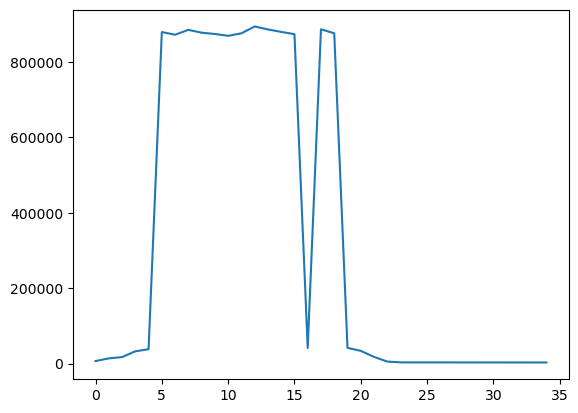

In [9]:
with open ("../FlashOperation/y_path_redo.pkl", "rb") as f:
    y_path = pickle.load(f)
print(y_path)
plt.plot(y_path)